# Covid-19 Daily cases per Million in Indian States

## Are we flattening the curve? You be the judge!

The notebook gathers population data from wikipedia, and daily cases from an API from Covid19india.org. This notebook visualizes the daily reported cases per million population over days since number of cases reported per million crossed 1. 

### Importing Libraries

In [148]:
from pandas import Series #for data manipulation
import datetime #for time-related manipulation
import pandas as pd #load dataset into dataframe
import requests #to make api request
import matplotlib.pyplot as plt #to make visualization
import numpy as np #for analysis
import random #for testing data on random if cleaning came correct

### Getting Population table from wikipedia

In [149]:
#wikipedia url and transfering to pandas dataframe
url = "https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_population"
table = pd.read_html(url)[1]

In [150]:
table.head(2)

,Rank,State or union territory,Population,Population (%),Decadal growth(2001–2011),Rural population,Percent rural,Urban population,Percent urban,Area[16],Density[a],Sex ratio
0,1,Uttar Pradesh,199812341,NaN,20.2%,155317278,NaN,44495063,NaN,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,NaN,20.0%,61556074,NaN,50818259,NaN,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929


In [151]:
#lets rename the state column to 'state_ut' and 'Population' to avoid spaces and caps.
table=table.rename(columns={"State or union territory": "state_ut", "Population" :'popn'})
table.head(2)


,Rank,state_ut,popn,Population (%),Decadal growth(2001–2011),Rural population,Percent rural,Urban population,Percent urban,Area[16],Density[a],Sex ratio
0,1,Uttar Pradesh,199812341,NaN,20.2%,155317278,NaN,44495063,NaN,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,NaN,20.0%,61556074,NaN,50818259,NaN,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929


In [152]:
#not all columns are clean, but we need population column to be clean, let check that.
print('Population datatype',table['popn'].dtypes)

Population datatype object


In [153]:
#changing population datatype to type int
print(table['popn'].values)

['199812341' '112374333' '104099452' '91276115' '72626809' '72147030'
 '68548437' '61095297' '60439692' '49,577,103[b]' '41974219' '35003674'
 '33406061' '32988134' '31205576' '27743338' '25545198' '25351462'
 '10086292' '6864602' '3673917' '2966889' '2570390' '1978502' '1458545'
 '1383727' '1097206' '610577' '16787941' '12267032' '1247953' '1055450'
 '585764' '380581' '274000' '64473' '1210569573']


In [154]:
#we have few celss that are not int, we need to change that
table['popn']=table['popn'].str.rstrip('[b]')
table['popn']=table['popn'].str.replace(',', '').astype('int')
table['popn'].values


array([ 199812341,  112374333,  104099452,   91276115,   72626809,
         72147030,   68548437,   61095297,   60439692,   49577103,
         41974219,   35003674,   33406061,   32988134,   31205576,
         27743338,   25545198,   25351462,   10086292,    6864602,
          3673917,    2966889,    2570390,    1978502,    1458545,
          1383727,    1097206,     610577,   16787941,   12267032,
          1247953,    1055450,     585764,     380581,     274000,
            64473, 1210569573])

In [155]:
#lets delete the columns except state and population
table=table[['state_ut','popn']]
#All good, lets save save the population table as csv
table.to_csv('popn_table.csv', index=None)

### Getting covid timeseries from api request

In [156]:
#this function takes in the timeseries data api from covid19india.org
def _india_timeseries():
    url = 'https://api.covid19india.org/v3/timeseries.json'
    r = requests.get(url)
    try:
        r.raise_for_status()
        return r.json()
    except:
        return None
json=_india_timeseries()
#lets look at json data:
print("JSON Format and sample of contents")
for key,value, in json.items():
    print('Key: ', key )
    print("Values: ")
    for k,v in value.items():
        print(k)
        print(v)
        break
    break

    
    

JSON Format and sample of contents
Key:  AN
Values: 
2020-03-26
{'delta': {'confirmed': 1}, 'total': {'confirmed': 1}}


In [157]:
#THe previous api has state names as state codes,
#we don't have state codes, so we take another api from the same
#provider which has both statecode and state name
#get the statecode and statename and make a dictionary
def get_statecodes():
    url='https://api.covid19india.org/data.json'
    r=requests.get(url)
    try:
        r.raise_for_status()
        return r.json()
    except:
        return None

code_json=get_statecodes()

In [158]:
#lets look at code_json data:
print("JSON Format and sample of contents")
for key,value, in code_json.items():
    print('Key: ', key )
    for item in value[0]:
        print('Value (Sample data): ')
        print(value[0])
        break

print("\nJSON Format of statewise data")
for key, value in code_json['statewise'][1].items():
    print('Key: ',key)

JSON Format and sample of contents
Key:  cases_time_series
Value (Sample data): 
{'dailyconfirmed': '1', 'dailydeceased': '0', 'dailyrecovered': '0', 'date': '30 January ', 'totalconfirmed': '1', 'totaldeceased': '0', 'totalrecovered': '0'}
Key:  statewise
Value (Sample data): 
{'active': '210635', 'confirmed': '548817', 'deaths': '16485', 'deltaconfirmed': '19230', 'deltadeaths': '382', 'deltarecovered': '11495', 'lastupdatedtime': '28/06/2020 21:43:13', 'migratedother': '56', 'recovered': '321641', 'state': 'Total', 'statecode': 'TT', 'statenotes': ''}
Key:  tested
Value (Sample data): 
{'individualstestedperconfirmedcase': '75.64', 'positivecasesfromsamplesreported': '', 'samplereportedtoday': '', 'source': 'Press_Release_ICMR_13March2020.pdf', 'source1': '', 'testedasof': '13/03/2020', 'testpositivityrate': '1.20%', 'testsconductedbyprivatelabs': '', 'testsperconfirmedcase': '83.33', 'testspermillion': '5', 'totalindividualstested': '5900', 'totalpositivecases': '78', 'totalsamples

In [159]:
#lets create a dictionary of state codes to state names so that it is alligned with population table
#gets easier to manipulate, as you will see
statedic={}
for k in code_json['statewise']:
    statedic[k['statecode']]=k['state']
    #print(k['state'],k['statecode'])
print(statedic)

{'TT': 'Total', 'MH': 'Maharashtra', 'TN': 'Tamil Nadu', 'DL': 'Delhi', 'GJ': 'Gujarat', 'UP': 'Uttar Pradesh', 'RJ': 'Rajasthan', 'WB': 'West Bengal', 'MP': 'Madhya Pradesh', 'HR': 'Haryana', 'UN': 'State Unassigned', 'KA': 'Karnataka', 'AP': 'Andhra Pradesh', 'BR': 'Bihar', 'TG': 'Telangana', 'JK': 'Jammu and Kashmir', 'AS': 'Assam', 'OR': 'Odisha', 'PB': 'Punjab', 'KL': 'Kerala', 'UT': 'Uttarakhand', 'CT': 'Chhattisgarh', 'JH': 'Jharkhand', 'TR': 'Tripura', 'LA': 'Ladakh', 'GA': 'Goa', 'HP': 'Himachal Pradesh', 'MN': 'Manipur', 'CH': 'Chandigarh', 'PY': 'Puducherry', 'NL': 'Nagaland', 'MZ': 'Mizoram', 'AR': 'Arunachal Pradesh', 'SK': 'Sikkim', 'DN': 'Dadra and Nagar Haveli and Daman and Diu', 'AN': 'Andaman and Nicobar Islands', 'ML': 'Meghalaya', 'LD': 'Lakshadweep'}


In [160]:
#creating a df with required fields for analysis
df=pd.DataFrame(columns=['statecode','date','state','delta', 'confirmed', 'population', 'cases_per_mil'])
#Reading back the tables csv we just saved earlier
statedf=pd.read_csv('popn_table.csv')
#setting index as statenames for analysis
statedf=statedf.set_index(statedf['state_ut'])

for k,v in json.items():
    delta=0
    for date, value in v.items():   
        try:
            #print(value['total'])
            popn=statedf.loc[statedic[k]][1]
            confirmed=value['total']['confirmed']
            #case_mil=int((confirmed/popn)*1000000)
            delta=confirmed-delta
            case_mil=(delta/popn)*1000000
            series=pd.Series([k,date,statedic[k],delta,confirmed,
                              popn,case_mil],index=df.columns)
            #print(series)
            df = df.append(series, ignore_index=True)
            delta=confirmed
        except:
            #exception occurs since starting date for diff state is diff
            pass
            

        
    #break
    
#print(json['statewise'][2])
df.head(5)


,statecode,date,state,delta,confirmed,population,cases_per_mil
0,AN,2020-03-26,Andaman and Nicobar Islands,1,1,380581,2.627562
1,AN,2020-03-27,Andaman and Nicobar Islands,5,6,380581,13.137808
2,AN,2020-03-28,Andaman and Nicobar Islands,3,9,380581,7.882685
3,AN,2020-03-29,Andaman and Nicobar Islands,0,9,380581,0.000000
4,AN,2020-03-30,Andaman and Nicobar Islands,1,10,380581,2.627562


In [161]:
#starting dates for different states are different, earliest is 30th Jan 2020 for Kerala,
#lets make it uniform by adding rows with zero to dates that does'nt exit in df atm
df=df.sort_values(['state','date'],ascending=True)
mindate=df['date'].min()
mindate=datetime.datetime.strptime(mindate, '%Y-%m-%d').date()
print("Earliest Date:",mindate)
#print(df.head(10))
for statecode, state in statedic.items():
    try:
        statemin=df['date'][df['state']==state].min()
        statemin=datetime.datetime.strptime(statemin, '%Y-%m-%d').date()
        while mindate != statemin:
            newdate=statemin-datetime.timedelta(days=1)
            newdate=newdate.strftime('%Y-%m-%d')
            series=pd.Series([statecode,newdate,state,0,0,popn,0],index=df.columns)
            df=df.append(series, ignore_index=True)
            statemin=df['date'][df['state']==state].min()
            statemin=datetime.datetime.strptime(statemin, '%Y-%m-%d').date()
    except:
        print('Not include for state: ', state)
    

Earliest Date: 2020-01-30
Not include for state:  Total
Not include for state:  State Unassigned
Not include for state:  Manipur
Not include for state:  Lakshadweep


In [162]:
#lets see the df
df.head(3)

,statecode,date,state,delta,confirmed,population,cases_per_mil
0,AN,2020-03-26,Andaman and Nicobar Islands,1,1,380581,2.627562
1,AN,2020-03-27,Andaman and Nicobar Islands,5,6,380581,13.137808
2,AN,2020-03-28,Andaman and Nicobar Islands,3,9,380581,7.882685


In [163]:
#lets see the min date at random
df=df.set_index(df['state'])
for i in range(3):
    index=random.choice(df.index.values.tolist())
    print('Min date for ',index, end=': ')
    print(df['date'].loc[index].min())

Min date for  Assam: 2020-01-30
Min date for  Ladakh: 2020-01-30
Min date for  Mizoram: 2020-01-30


In [164]:
#All are min at 2020-01-30, we can save csv and we are good to go
df.to_csv('cleaned_data.csv',index=False)

### Small Analysis

Lets go with pareto principle, and choose the top 20% of states and/or UT with most number of confirmed cases. 20% of 37 states and UT would be 7. Lets go with 7 States/UT for plotting.

In [165]:
#lets find out top 7 states in terms of confirmed cases
df=df.sort_values('confirmed',ascending=False)
rest=df['state'].unique()[7:]
top=df['state'].unique()[:7]
print('Top 7 states: \n', top)

Top 7 states: 
 ['Maharashtra' 'Delhi' 'Tamil Nadu' 'Gujarat' 'Uttar Pradesh'
 'West Bengal' 'Rajasthan']


In [166]:
#make moving avg of cases per mil

#reseting index and making state as column only
df=df.reset_index(drop=True)
#sorting it
df=df.sort_values(['state','date'])

#list to store smoothened numbers
ls=[]
for state in df['state'].unique():
    #gets list of values for unique state in topten
    values=list(df['cases_per_mil'][df['state']==state])
    #print('state: ', state, 'length', len(values))
    for count, v in enumerate(list(values)):
        if count<4:
            ls.append(0)
        else:
            #print(values)
            newv=(values[count]+values[count-1]+values[count-2]+values[count-3]+values[count-4])/5
            ls.append(newv)
        
    
if len(df) == len(ls):
    print('We are all good, we go a list same size as df: {}'.format(len(df)))

#creating a new column
df['cpm_smoothened']=ls
#print(df[['state','date','cases_per_mil','cpm_smoothened']].tail(140))
df.head(5)

We are all good, we go a list same size as df: 5105


,statecode,date,state,delta,confirmed,population,cases_per_mil,cpm_smoothened
4011,AN,2020-01-30,Andaman and Nicobar Islands,0,0,91276115,0.0,0.0
4012,AN,2020-01-31,Andaman and Nicobar Islands,0,0,91276115,0.0,0.0
4013,AN,2020-02-01,Andaman and Nicobar Islands,0,0,91276115,0.0,0.0
4014,AN,2020-02-02,Andaman and Nicobar Islands,0,0,91276115,0.0,0.0
4015,AN,2020-02-03,Andaman and Nicobar Islands,0,0,91276115,0.0,0.0


### Visualization

In [167]:
#making dates index for the chart and creating series
df=df.sort_values('date',ascending=True)
df=df.set_index(df['date'])

In [168]:
#create df with only required states
df=df[df.state.isin(top)]

#delete all the rows with cpm_smoothened less than 1

df=df[df['cpm_smoothened']>=1]
#creating x-axis

#getting state with max rows
mstate=list(df['state'].mode().values)[0]
mnumber=len(df[df['state']==list(df['state'].mode().values)[0]])
print('Max rows: {}, State: {}'.format(mnumber, mstate))
temp=df[df['state']==mstate]
x1=[]

for count,date in enumerate(list(temp['date'])):
    i=i+1
    dateobj=datetime.datetime.strptime(date, '%Y-%m-%d').date()
    day='Day'+str(count+1)
    x1.append(day)
    #print(type(date))

print('x-axis')
print(x1)
print('length', len(x1))

Max rows: 89, State: Delhi
x-axis
['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'Day8', 'Day9', 'Day10', 'Day11', 'Day12', 'Day13', 'Day14', 'Day15', 'Day16', 'Day17', 'Day18', 'Day19', 'Day20', 'Day21', 'Day22', 'Day23', 'Day24', 'Day25', 'Day26', 'Day27', 'Day28', 'Day29', 'Day30', 'Day31', 'Day32', 'Day33', 'Day34', 'Day35', 'Day36', 'Day37', 'Day38', 'Day39', 'Day40', 'Day41', 'Day42', 'Day43', 'Day44', 'Day45', 'Day46', 'Day47', 'Day48', 'Day49', 'Day50', 'Day51', 'Day52', 'Day53', 'Day54', 'Day55', 'Day56', 'Day57', 'Day58', 'Day59', 'Day60', 'Day61', 'Day62', 'Day63', 'Day64', 'Day65', 'Day66', 'Day67', 'Day68', 'Day69', 'Day70', 'Day71', 'Day72', 'Day73', 'Day74', 'Day75', 'Day76', 'Day77', 'Day78', 'Day79', 'Day80', 'Day81', 'Day82', 'Day83', 'Day84', 'Day85', 'Day86', 'Day87', 'Day88', 'Day89']
length 89


In [169]:
df.head(5)

,statecode,date,state,delta,confirmed,population,cases_per_mil,cpm_smoothened
date,,,,,,,,
2020-04-01,DL,2020-04-01,Delhi,32,152,16787941,1.906130,1.334291
2020-04-02,DL,2020-04-02,Delhi,141,293,16787941,8.398886,2.906848
2020-04-03,TN,2020-04-03,Tamil Nadu,102,411,72147030,1.413780,1.000734
2020-04-03,DL,2020-04-03,Delhi,93,386,16787941,5.539691,3.740780
2020-04-04,TN,2020-04-04,Tamil Nadu,74,485,72147030,1.025683,1.158745


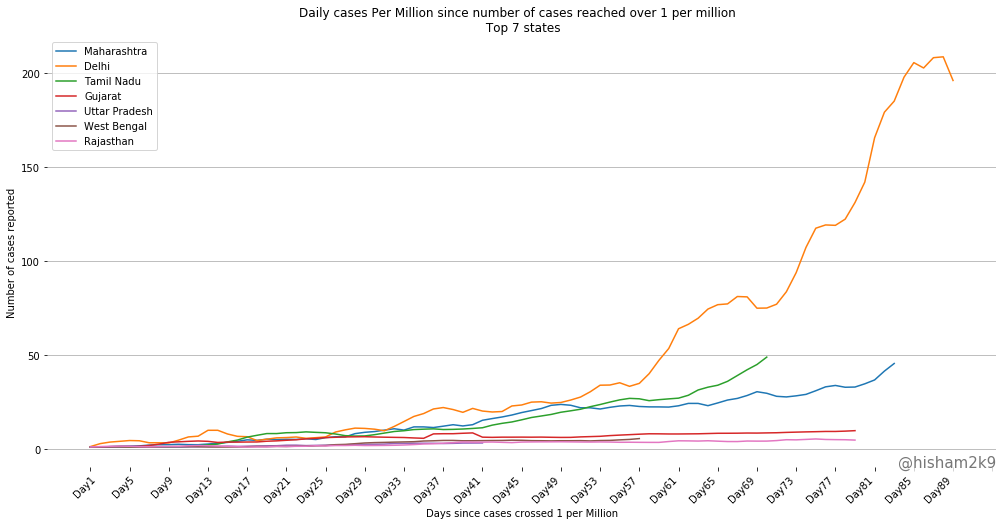

In [175]:
#plt.figure(figsize=(40,15))
#plt.tick_params(axis='x', colors='#777777', labelsize=50)
fig, ax = plt.subplots()
plt.box(False)
fig.tight_layout()
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
#ax.xaxis.set_ticks_position('top')
plt.locator_params(axis='x',nbins=32)
plt.grid(which='major', axis='y', linestyle='-')
ax.xaxis.set_ticks(np.arange(0, len(ls), 4))
for state in top:
    #print('state',state)
    temp=df[df['state'].isin([state])]
    #print(temp['state'])
    y1 = list(temp['cpm_smoothened'])
    try:
        plt.plot(x1, y1, label = state)
    except:
        while len(y1) != mnumber:
            y1.append(np.nan)
        try:
            plt.plot(x1,y1,label=state)
        except:
            print('state {} not added due to error'.format(state))

plt.legend()
#plt.tick_params(axis='x', colors='#777777', labelsize=12)
#plt.tick_params(axis='y', colors='#777777', labelsize=12)
plt.title('Daily cases Per Million since number of cases reached over 1 per million  \n Top 7 states')
plt.xlabel('Days since cases crossed 1 per Million')
plt.ylabel('Number of cases reported')
plt.text(1, 0, '@hisham2k9', transform=ax.transAxes,size=15, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
fig.set_size_inches(15, 7)
plt.show()

In [176]:
#saving image
fig.savefig('cpm.png')